# Working With Time Series Data Exercises


For all of the datasets below, examine the data types of each column, ensure that the dates are in the proper format, and set the dataframe's index to the date column as appropriate.

---

## Use the `sf_temps` dataset for the exercises below:

### 1. Resample by the day and take the average temperature. Visualize the average temperature over time.

In [7]:
# imports
import pandas as pd
from vega_datasets import data
# get data
sf_temps = data.sf_temps()
sf_temps

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00
...,...,...
8754,50.4,2010-12-31 19:00:00
8755,49.9,2010-12-31 20:00:00
8756,49.4,2010-12-31 21:00:00
8757,48.8,2010-12-31 22:00:00


In [8]:
# view dtypes
sf_temps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   temp    8759 non-null   float64       
 1   date    8759 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 137.0 KB


The date column is already in datetime format so I don't need to convert anything. Just need to set the date as the index.

In [9]:
# set date as index
sf_temps = sf_temps.set_index('date').sort_index()
sf_temps.head()

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9
2010-01-01 03:00:00,46.5
2010-01-01 04:00:00,46.0


In [13]:
# resample by day, using average temp
sf_temps.resample('D').mean()

,temp
date,
2010-01-01,49.170833
2010-01-02,49.304167
2010-01-03,49.391667
2010-01-04,49.445833
2010-01-05,49.491667
...,...
2010-12-27,48.991667
2010-12-28,49.000000
2010-12-29,49.012500


[Text(0.5, 1.0, 'Average Daily Temperature'), Text(0, 0.5, 'temp (F)')]

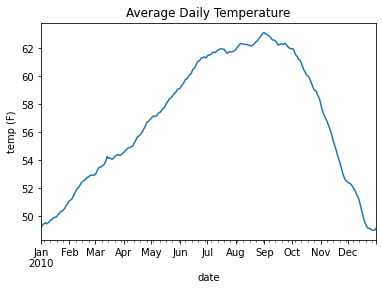

In [68]:
# visualize daily avg temp
import matplotlib.pyplot as plt
sf_temps.resample('D').mean().temp.plot().set(title='Average Daily Temperature', ylabel='temp (F)')

### 2. Write the code necessary to visualize the minimum temperature over time.

[Text(0.5, 1.0, 'Minimum Daily Temperature'), Text(0, 0.5, 'temp (F)')]

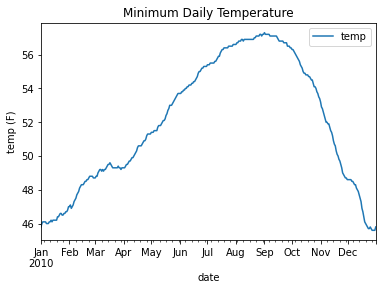

In [67]:
# plot minimum temps
sf_temps.resample('D').min().plot().set(title='Minimum Daily Temperature', ylabel='temp (F)')

### 3. Write the code necessary to visualize the maximum temperature over time.

[Text(0.5, 1.0, 'Maximum Daily Temperature'), Text(0, 0.5, 'temp (F)')]

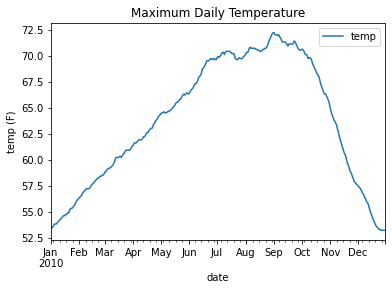

In [66]:
# plot maximum temps
sf_temps.resample('D').max().plot().set(title='Maximum Daily Temperature', ylabel='temp (F)')

### 4. Which month is the coldest, on average?

In [30]:
# view coldest month on avg
sf_temps.resample('M').mean().idxmin()

temp   2010-01-31
dtype: datetime64[ns]

January is the coldest month, on average.

### 5. Which month has the highest average temperature?

In [31]:
# view hottest month on avg
sf_temps.resample('M').mean().idxmax()

temp   2010-09-30
dtype: datetime64[ns]

September is the hottest month, on average.

### 6. Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

In [60]:
# resample by day, get min and max
d_temp_var = sf_temps.resample('D').agg(['min', 'max'])
# create column to see daily temp variability
d_temp_var['variation'] = d_temp_var.temp['max'] - d_temp_var.temp['min']
# view date with greatest temp variability
d_temp_var.variation.idxmax()
# view month with greatest temp variability
d_temp_var.resample('M').sum().variation.idxmax()

Timestamp('2010-07-31 00:00:00', freq='M')

July has the highest total daily temperature variability, but the date with the highest temperature variability is August 31.

### 7. Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 separate lines.

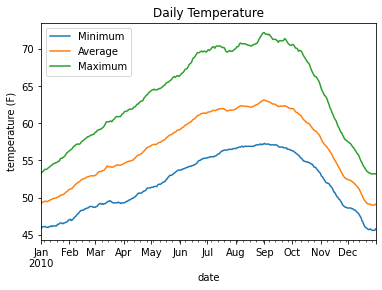

In [65]:
# plot daily min, mean, and max temps
sf_temps.resample('D').min().temp.plot(label='Minimum')
sf_temps.resample('D').mean().temp.plot(label='Average')
sf_temps.resample('D').max().temp.plot(label='Maximum')
plt.ylabel('temperature (F)')
plt.title('Daily Temperature')
plt.legend()

---
## Use the `seattle_weather` dataset to answer the following questions:

### 1. Which year and month combination has the highest amount of precipitation?

In [69]:
# assign data to variable
seattle_weather = data.seattle_weather()
seattle_weather

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,fog
1457,2015-12-28,1.5,5.0,1.7,1.3,fog
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [70]:
# check dtypes
seattle_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1461 non-null   datetime64[ns]
 1   precipitation  1461 non-null   float64       
 2   temp_max       1461 non-null   float64       
 3   temp_min       1461 non-null   float64       
 4   wind           1461 non-null   float64       
 5   weather        1461 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 68.6+ KB


In [73]:
# set date as index
seattle_weather = seattle_weather.set_index('date').sort_index()
seattle_weather.head()

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain


In [76]:
# see which month/year had highest precipitation
seattle_weather.resample('M').max().precipitation.idxmax()

Timestamp('2015-03-31 00:00:00', freq='M')

March 2015 had the highest amount of precipitation.

### 2. Visualize the amount of monthly precipitation over time.

<AxesSubplot:xlabel='date'>

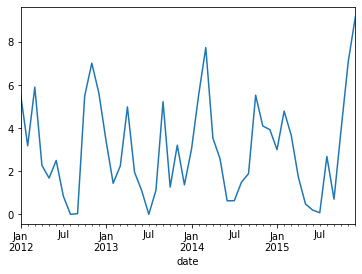

In [77]:
seattle_weather.resample('M').mean().precipitation.plot()

### 3. Visualize the amount of wind over time. Choose a time interval you think is appropriate.

<AxesSubplot:xlabel='date'>

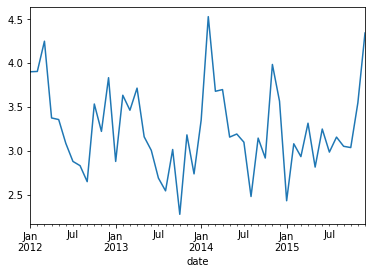

In [78]:
seattle_weather.resample('M').mean().wind.plot()

### 4. Which year-month combination is the windiest?

In [79]:
seattle_weather.resample('M').mean().wind.idxmax()

Timestamp('2014-02-28 00:00:00', freq='M')

February 2014 is the windiest.

### 5. What's the sunniest year? (Hint: which year has the highest number of days where weather == sun?)

In [100]:
# create column of years
seattle_weather['year'] = seattle_weather.index.year
# show year with most sunny days
seattle_weather[seattle_weather.weather == 'sun'].groupby('year').weather.count().idxmax()

2014

2014 was the sunniest year.

### 6. In which month does it rain the most?

In [109]:
# create column of months
seattle_weather['month'] = seattle_weather.index.month_name()
# show month with most rainy days
seattle_weather[seattle_weather.weather == 'rain'].groupby('month').weather.count().idxmax()

'February'

February has the most rainy days.

### 7. Which month has the most number of days with a non-zero amount of precipitation?

In [103]:
seattle_weather[seattle_weather.precipitation != 0].groupby('month').precipitation.count().idxmax()

'December'

December has the most days with a non-zero amount of precipitation.

---
## Use the `flights_20k` dataset to answer the following questions:

### 1. Convert any negative delays to 0.

In [126]:
# get data
flights = data.flights_20k()
flights

,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,-5,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,-15,550,MSY,MCO
4,2001-03-30 21:45:00,-2,229,STL,IND
...,...,...,...,...,...
19995,2001-03-22 15:10:00,4,446,SAN,OAK
19996,2001-01-19 13:05:00,-6,1489,SEA,MCI
19997,2001-02-07 11:37:00,-16,1848,MCO,PHX
19998,2001-02-24 16:50:00,42,443,RDU,BNA


In [127]:
# view dtypes
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         20000 non-null  datetime64[ns]
 1   delay        20000 non-null  int64         
 2   distance     20000 non-null  int64         
 3   origin       20000 non-null  object        
 4   destination  20000 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 781.4+ KB


In [128]:
# set date as index
flights = flights.set_index('date').sort_index()
flights.head()

,delay,distance,origin,destination
date,,,,
2001-01-01 00:01:00,14,405,MCI,MDW
2001-01-01 06:20:00,0,491,BNA,MCI
2001-01-01 06:30:00,-8,251,MDW,STL
2001-01-01 07:00:00,-10,361,OAK,ONT
2001-01-01 07:00:00,0,303,MSY,HOU


In [129]:
# replace negative delays with 0
flights.delay = np.where(flights.delay < 0, 0, flights.delay)
flights.head()

,delay,distance,origin,destination
date,,,,
2001-01-01 00:01:00,14,405,MCI,MDW
2001-01-01 06:20:00,0,491,BNA,MCI
2001-01-01 06:30:00,0,251,MDW,STL
2001-01-01 07:00:00,0,361,OAK,ONT
2001-01-01 07:00:00,0,303,MSY,HOU


### 2. Which hour of the day has the highest average delay?

3


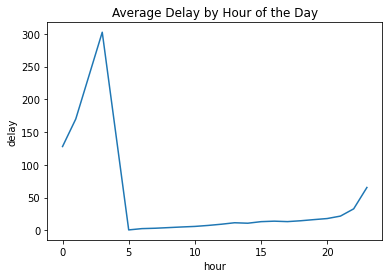

In [147]:
# create column of hours
flights['hour'] = flights.index.hour
# show hour with greatest avg delay
print(flights.groupby('hour').mean().delay.idxmax())
# visualize
flights.groupby('hour').mean().delay.plot().set(title='Average Delay by Hour of the Day', ylabel='delay');

3AM has the highest average delay.

### 3. Does the day of the week make a difference in the delay amount?

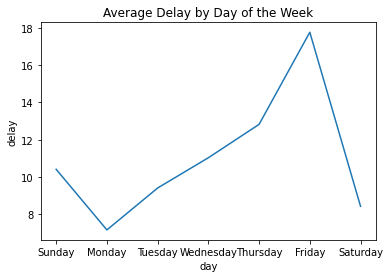

In [149]:
# create column of weekdays
flights['day'] = flights.index.day_name()
# visualize avg delay by weekday
flights.groupby('day').mean().reindex(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']).delay.plot().set(title='Average Delay by Day of the Week', ylabel='delay');

### 4. Does the month make a difference in the delay amount?

[Text(0.5, 1.0, 'Average Delay by Month'), Text(0, 0.5, 'delay')]

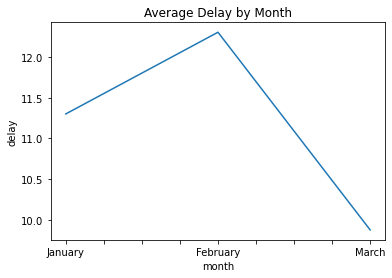

In [157]:
# create column of months
flights['month'] = flights.index.month_name()
# view which months are in this data
flights.month.value_counts()
# visualize avg delay by month
flights.groupby('month').mean().reindex(['January', 'February', 'March']).delay.plot().set(title='Average Delay by Month', ylabel='delay')